<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_4_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.679362,37.445069,75.851609,-7243.574353,-7065.598313,1152.936011,-8218.534324
1,0.0,1.0,39.889931,26.233212,48.763099,1541.418582,1666.304824,3017.594293,-1351.289469
2,0.0,2.0,36.696234,84.313349,73.379609,39151.787613,39356.176805,11352.449296,28003.727509
3,0.0,3.0,24.979168,41.809179,58.545499,3426.581956,3561.915803,7210.058803,-3648.143000
4,0.0,4.0,60.932586,41.572519,32.147022,3498.183434,3642.835560,3105.235843,537.599718
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,81.105212,76.970821,48.600850,-45519.776548,-45303.099665,-1740.714100,-43562.385565
119996,999.0,116.0,53.780079,31.967663,97.201395,3110.298402,3303.247540,-1995.289039,5298.536579
119997,999.0,117.0,83.189612,83.019716,95.371444,48573.392012,48844.972784,-6241.805205,55086.777989
119998,999.0,118.0,50.202262,24.045901,56.287473,-779.933510,-639.397874,2187.538229,-2826.936103


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.679362,37.445069,75.851609,-7243.574353,-7065.598313,1152.936011,-8218.534324
1,0.0,1.0,39.889931,26.233212,48.763099,1541.418582,1666.304824,3017.594293,-1351.289469
2,0.0,2.0,36.696234,84.313349,73.379609,39151.787613,39356.176805,11352.449296,28003.727509
3,0.0,3.0,24.979168,41.809179,58.545499,3426.581956,3561.915803,7210.058803,-3648.143000
4,0.0,4.0,60.932586,41.572519,32.147022,3498.183434,3642.835560,3105.235843,537.599718
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,81.105212,76.970821,48.600850,-45519.776548,-45303.099665,-1740.714100,-43562.385565
119996,999.0,116.0,53.780079,31.967663,97.201395,3110.298402,3303.247540,-1995.289039,5298.536579
119997,999.0,117.0,83.189612,83.019716,95.371444,48573.392012,48844.972784,-6241.805205,55086.777989
119998,999.0,118.0,50.202262,24.045901,56.287473,-779.933510,-639.397874,2187.538229,-2826.936103


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    54.679362  37.445069  ...   1152.936011  -8218.534324
      1.0    39.889931  26.233212  ...   3017.594293  -1351.289469
      2.0    36.696234  84.313349  ...  11352.449296  28003.727509
      3.0    24.979168  41.809179  ...   7210.058803  -3648.143000
      4.0    60.932586  41.572519  ...   3105.235843    537.599718
...                ...        ...  ...           ...           ...
999.0 115.0  81.105212  76.970821  ...  -1740.714100 -43562.385565
      116.0  53.780079  31.967663  ...  -1995.289039   5298.536579
      117.0  83.189612  83.019716  ...  -6241.805205  55086.777989
      118.0  50.202262  24.045901  ...   2187.538229  -2826.936103
      119.0  35.244935  46.619108  ...   4651.182305   6583.362990

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    54.679362  37.445069  ...   1152.936011  -8218.534324
      1.0    39.889931  26.233212  ...   3017.594293  -1351.289469
      2.0    36.696234  84.313349  ...  11352.449296  28003.727509
      3.0    24.979168  41.809179  ...   7210.058803  -3648.143000
      4.0    60.932586  41.572519  ...   3105.235843    537.599718
...                ...        ...  ...           ...           ...
999.0 115.0  81.105212  76.970821  ...  -1740.714100 -43562.385565
      116.0  53.780079  31.967663  ...  -1995.289039   5298.536579
      117.0  83.189612  83.019716  ...  -6241.805205  55086.777989
      118.0  50.202262  24.045901  ...   2187.538229  -2826.936103
      119.0  35.244935  46.619108  ...   4651.182305   6583.362990

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.679362,37.445069,75.851609,-7243.574353,-7065.598313,1152.936011,-8218.534324
1,0.0,1.0,39.889931,26.233212,48.763099,1541.418582,1666.304824,3017.594293,-1351.289469
2,0.0,2.0,36.696234,84.313349,73.379609,39151.787613,39356.176805,11352.449296,28003.727509
3,0.0,3.0,24.979168,41.809179,58.545499,3426.581956,3561.915803,7210.058803,-3648.143000
4,0.0,4.0,60.932586,41.572519,32.147022,3498.183434,3642.835560,3105.235843,537.599718
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,81.105212,76.970821,48.600850,-45519.776548,-45303.099665,-1740.714100,-43562.385565
119996,999.0,116.0,53.780079,31.967663,97.201395,3110.298402,3303.247540,-1995.289039,5298.536579
119997,999.0,117.0,83.189612,83.019716,95.371444,48573.392012,48844.972784,-6241.805205,55086.777989
119998,999.0,118.0,50.202262,24.045901,56.287473,-779.933510,-639.397874,2187.538229,-2826.936103


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    54.679362  37.445069  ...   1152.936011  -8218.534324
      1.0    39.889931  26.233212  ...   3017.594293  -1351.289469
      2.0    36.696234  84.313349  ...  11352.449296  28003.727509
      3.0    24.979168  41.809179  ...   7210.058803  -3648.143000
      4.0    60.932586  41.572519  ...   3105.235843    537.599718
...                ...        ...  ...           ...           ...
999.0 115.0  81.105212  76.970821  ...  -1740.714100 -43562.385565
      116.0  53.780079  31.967663  ...  -1995.289039   5298.536579
      117.0  83.189612  83.019716  ...  -6241.805205  55086.777989
      118.0  50.202262  24.045901  ...   2187.538229  -2826.936103
      119.0  35.244935  46.619108  ...   4651.182305   6583.362990

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

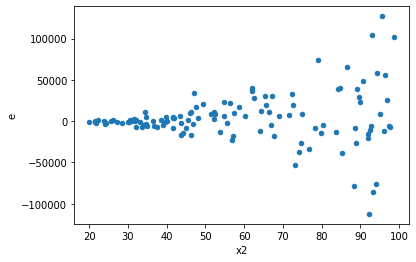

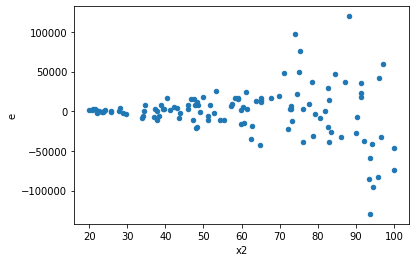

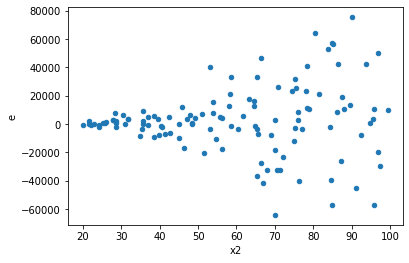

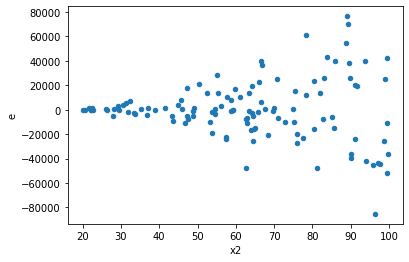

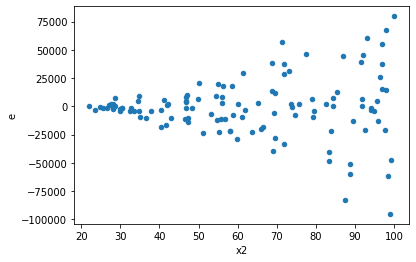

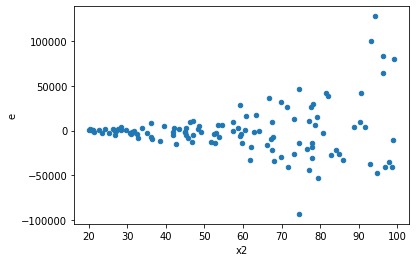

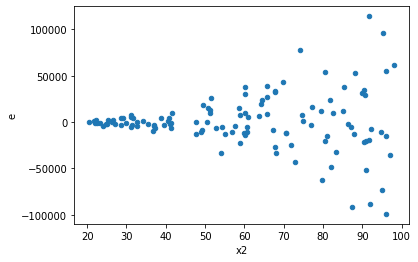

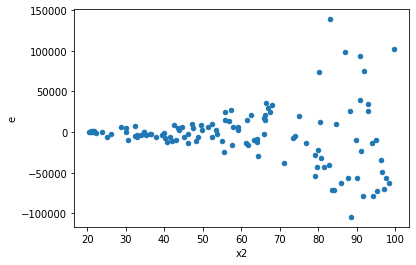

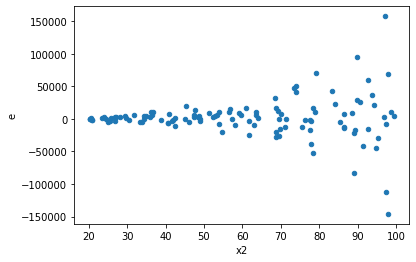

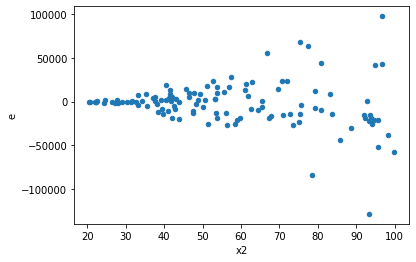

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,105474974650.07092,1645817939.2005153,2397158514.774339,37404953.16364808,64.08665997486163,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,92168177337.33475,2484292243.31884,2094731303.1212442,56461187.348155454,37.100376409099326,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,49002575744.13268,1555713022.1615806,1113694903.2757428,35357114.14003592,31.49846729189565,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,57697940730.40294,3971694062.8406587,1311316834.781885,90265774.15546952,14.527287302974155,1.7763568394002505e-15,0.9999999999999991,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,70491477253.43533,3180384870.093776,1602079028.4871666,72281474.3203131,22.164448685531834,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,78463545077.01328,1095183698.9348853,1783262388.113938,24890538.612156484,71.64418640756118,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,94819775311.38034,2287283209.3875923,2154994893.440462,51983709.304263465,41.45519668146728,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,122960342645.9368,1407212496.0269535,2794553241.9531093,31982102.18243076,87.37866028982566,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,112744608103.6516,1291904450.4411001,2562377456.9011726,29361464.782752275,87.27008260181839,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,105474974650.07092,1645817939.2005153,2397158514.774339,37404953.16364808,64.08665997486163,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,92168177337.33475,2484292243.31884,2094731303.1212442,56461187.348155454,37.100376409099326,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,49002575744.13268,1555713022.1615806,1113694903.2757428,35357114.14003592,31.49846729189565,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,57697940730.40294,3971694062.8406587,1311316834.781885,90265774.15546952,14.527287302974155,1.7763568394002505e-15,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,70491477253.43533,3180384870.093776,1602079028.4871666,72281474.3203131,22.164448685531834,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,78463545077.01328,1095183698.9348853,1783262388.113938,24890538.612156484,71.64418640756118,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,94819775311.38034,2287283209.3875923,2154994893.440462,51983709.304263465,41.45519668146728,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,122960342645.9368,1407212496.0269535,2794553241.9531093,31982102.18243076,87.37866028982566,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,112744608103.6516,1291904450.4411001,2562377456.9011726,29361464.782752275,87.27008260181839,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64